In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from scikitplot import decomposition
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [2]:
data = pd.read_table("data/spiral.txt", header=None)
X = data.iloc[:,0:2]
y = data[2]

## Exploration donnée

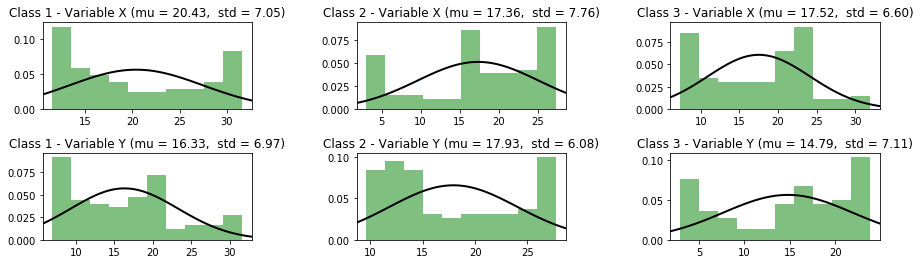

In [11]:
fig, ax = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.set_size_inches(15, 4)

for i in range(0,3):
#     d = preprocessing.scale(data[0][data[2] == i+1])
    d = np.array(data[0][data[2] == i+1])
    ax[0,i].hist(d, density=True, alpha=0.5, color='g')
    # plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
    xmin, xmax = ax[0,i].set_xlim()
    mu, std = norm.fit(d)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[0,i].plot(x, p, 'k', linewidth=2)
    title = "Class %d - Variable X (mu = %.2f,  std = %.2f)" % (i+1, mu, std)
    ax[0,i].set_title(title)
    
#     d = preprocessing.scale(data[1][data[2] == i+1])
    d = np.array(data[1][data[2] == i+1])
    ax[1,i].hist(d, density=True, alpha=0.5, color='g')
    # plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
    xmin, xmax = ax[1,i].set_xlim()
    mu, std = norm.fit(d)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[1,i].plot(x, p, 'k', linewidth=2)
    title = "Class %d - Variable Y (mu = %.2f,  std = %.2f)" % (i+1, mu, std)
    ax[1,i].set_title(title)


plt.show()

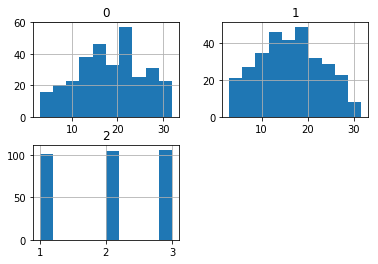

In [99]:
data.hist()
plt.show()

In [107]:
data[2].value_counts()

3    106
2    105
1    101
Name: 2, dtype: int64

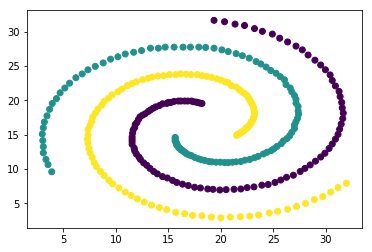

In [5]:
plt.scatter(x = data[0], y = data[1], c=data[2])

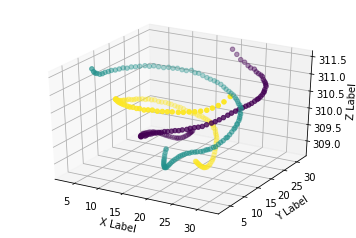

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

import numpy as np
from scipy.spatial.distance import pdist, squareform

K = squareform(np.exp(-gamma * pdist(X, 'sqeuclidean')))
D = np.exp(-(K ** 2) / ( 2*gamma**2))
z = np.sum(D, axis=0)


ax.scatter(data[0], data[1], z, c=data[2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

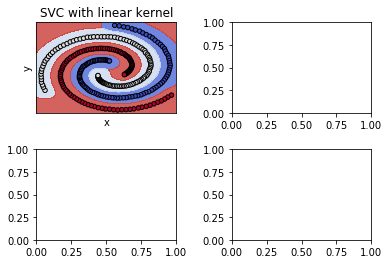

In [36]:
models = (svm.SVC(kernel='rbf', gamma=0.7), )
models = (clf.fit(X, y) for clf in models)

# # title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# # Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[0], X[1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

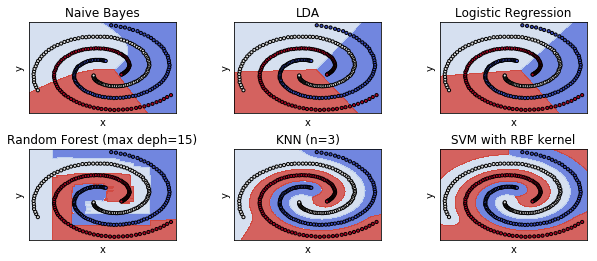

In [48]:
models = (GaussianNB(),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          RandomForestClassifier(max_depth=20),
          KNeighborsClassifier(3),
          svm.SVC(kernel='rbf', gamma=0.7))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Naive Bayes',
          'LDA',
          'Logistic Regression',
          'Random Forest (max deph=15)',
          'KNN (n=3)',
          'SVM with RBF kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3)
fig.set_size_inches(10, 4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[0], X[1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

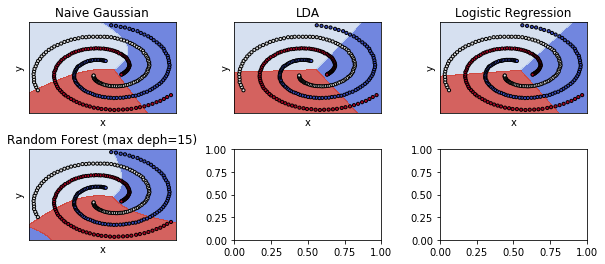

In [17]:
models = (GaussianNB(),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          QuadraticDiscriminantAnalysis())
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Naive Gaussian',
          'LDA',
          'Logistic Regression',
          'Random Forest (max deph=15)',
          'KNN (n=3)',
          'SVM with RBF kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3)
fig.set_size_inches(10, 4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[0], X[1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [47]:
models = (GaussianNB(),
          LinearDiscriminantAnalysis(),
          LogisticRegression(),
          RandomForestClassifier(max_depth=20),
          KNeighborsClassifier(3),
          svm.SVC(kernel='rbf', gamma=0.7))

for m in models:
    scores  = cross_val_score(m, X, y, cv=50)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores
    print(" ------------- ")

Accuracy: 0.28 (+/- 0.81)
 ------------- 
Accuracy: 0.28 (+/- 0.86)
 ------------- 
Accuracy: 0.28 (+/- 0.84)
 ------------- 
Accuracy: 0.97 (+/- 0.24)
 ------------- 
Accuracy: 1.00 (+/- 0.00)
 ------------- 
Accuracy: 1.00 (+/- 0.00)
 ------------- 


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
c = svm.SVC(kernel='rbf', gamma=0.7)
c.fit(X_train, y_train)
p = c.predict(X_test)
accuracy_score(y_true=y_test, y_pred=p)

1.0

In [7]:
classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    QuadraticDiscriminantAnalysis()]

In [ ]:
from matplotlib.colors import ListedColormap

ValueError: cannot reshape array of size 1950 into shape (26,25)

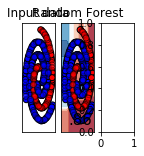

In [18]:

figure = plt.figure(figsize=(2, 2))
i = 1
ds_cnt = 0
h = .2 
X = data.iloc[:,0:2]
y = data[2]

X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


names = ["Random Forest", "QDA"]

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [82]:
clf = RandomForestClassifier(max_depth=15, n_estimators=10, max_features=1)
clf.fit(X_train, y_train)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

In [83]:
accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

0.992

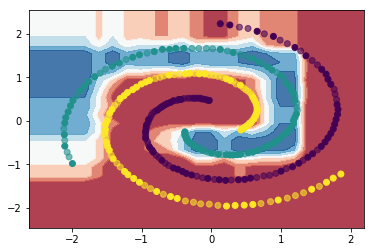

In [84]:
ax = plt.subplot(1,1,1)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6)

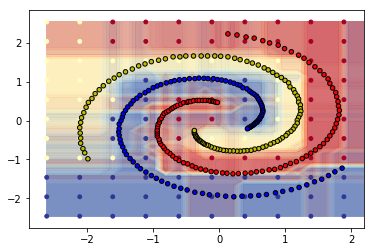

In [91]:
cmap = plt.cm.RdYlBu
plot_step_coarser = 0.5
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = clf.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                        c=Z_points_coarser, cmap=cmap)

plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
